In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [3]:
def demean(X):
    return X - np.mean(X, axis=0)

In [4]:
X = demean(X)

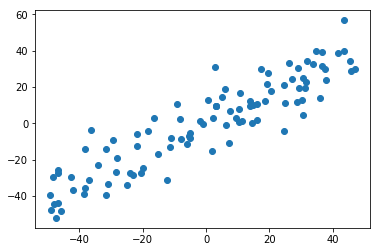

In [5]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [9]:
def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

# 获取w的单位向量
def direction(w):
    # np.linalg.norm是求矩阵的模
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注意1：每次求一个单位方向
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break

        cur_iter += 1

    return w

In [10]:
initial_w = np.random.random(X.shape[1])  # 注意2：不能用0向量开始
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.76811812, 0.64030817])

In [16]:
# X2 = np.empty(X.shape)
# for i in range(len(X)):
#    X2[i] = X[i] - X[i].dot(w) * w
X2 = X - X.dot(w).reshape(-1, 1) * w

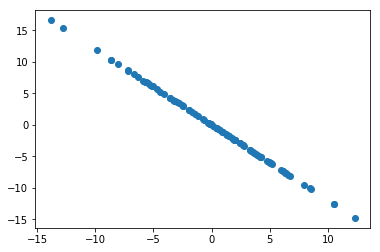

In [12]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [13]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.64030339,  0.76812211])

In [14]:
w.dot(w2)

6.233888038664759e-06

In [17]:
def first_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [18]:
first_n_components(2, X)

[array([0.75746255, 0.65287862]), array([-0.65287379,  0.7574667 ])]